##### Student Name: Davran Damkhan

# Title: Optimizing Feature Selection for Autism Screening Disorder Prediction Using Machine Learning Models

### Introduction and Data Description

Autism Spectrum Disorder (ASD) is a developmental condition that affects communication, behavior, and social interactions. Early and accurate screening for ASD is crucial for timely intervention and support. The Autism Screening Adult dataset, sourced from the UC Irvine Machine Learning Repository, provides valuable insights for predictive modeling and feature analysis to enhance the screening process for adults.

This project aims to leverage machine learning techniques to investigate the predictive capabilities of various feature sets within the dataset. The primary focus lies in understanding the contribution of specific screening question responses (referred to as "A scores") and demographic attributes in predicting ASD outcomes. By performing feature importance analysis and hypothesis-driven evaluation, the study seeks to streamline data collection by identifying the most influential predictors while ensuring robust model performance.

Through this effort, we aim to simplify the ASD screening process for adults, reducing the burden of unnecessary data collection and enhancing the efficiency of screening protocols.

Source:  https://archive.ics.uci.edu/dataset/426/autism+screening+adult 

#### Goal:
To investigate and evaluate the predictive power of A scores and other important features for Autism Spectrum Disorder (ASD) screening, aiming to simplify the feature set while maintaining or improving model performance.

#### Objective
 - **Hypothesis-Driven Analysis:** Test and validate three hypotheses to determine the contribution of A scores, demographic factors, and reduced feature sets in predicting ASD.
 - **Feature Importance Ranking:** Identify the most influential features for ASD screening using machine learning techniques, including Random Forest feature importance.
 - **Model Evaluation:** Assess the performance of predictive models with varying feature sets using metrics such as F1 score, with emphasis on maintaining a 95% confidence interval for performance benchmarks.
 - **Practical Implications:** Recommend a simplified and effective feature set to improve the efficiency of ASD screening processes while minimizing unnecessary data collection.

### Data Description

The Autism Screening Adult dataset comprises **704 observations** and **20 features**, categorized as follows:

1. **A Scores (10 features):**  
   - `A1_Score` to `A10_Score`: Binary responses to ten screening questions, designed to evaluate behavioral traits associated with ASD. These features are fully populated.
     

2. **Demographic and Family Data (7 features):**  
   - `age`: Participant's age, with 702 non-null values (some missing data).  
   - `gender`: Gender of the participant (fully populated).  
   - `ethnicity`: Participant's ethnicity, with 609 non-null values.  
   - `jaundice`: History of jaundice at birth (fully populated).  
   - `family_pdd`: Family history of pervasive developmental disorders (fully populated).  
   - `country_of_res`: Participant's country of residence (fully populated).  
   - `relation`: Participant's relation to the respondent, with 609 non-null values.
     

3. **Additional Features (3 features):**  
   - `used_app_before`: Indicates if the participant used the screening app previously (fully populated).  
   - `result`: The target variable indicating the ASD screening result (binary: positive/negative).  
   - `age_desc`: Descriptive age category of the participant (fully populated).

The dataset includes both numerical (`int64`, `float64`) and categorical (`object`) data types, with some missing values in `age`, `ethnicity`, and `relation`. Preprocessing steps will address these missing values to ensure data integrity for analysis.

### Data Preprocessing: Loading the Dataset and Addressing Missing Values

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import dataset from ucimlrepo

In [11]:
from ucimlrepo import fetch_ucirepo 
  
autism_screening_adult = fetch_ucirepo(id=426) 
  
orig_data_X = autism_screening_adult.data.features 
orig_data_y = autism_screening_adult.data.targets
orig_data_X.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family_pdd,country_of_res,used_app_before,result,age_desc,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',no,6,'18 and more',Self
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,'18 and more',Self
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',no,6,'18 and more',Self
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,'18 and more',NaN


In [12]:
orig_data_y.head(5)

,class
0,NO
1,NO
2,YES
3,NO
4,NO


In [13]:
orig_data_X.shape

(704, 20)

In [14]:
orig_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jaundice         704 non-null    object 
 14  family_pdd       704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [15]:
orig_data_X.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


#### Missing values

In [17]:
orig_data_X.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jaundice            0
family_pdd          0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
dtype: int64

Among the columns, only three have missing values:

 - Age: 2 missing values
 - Ethnicity: 95 missing values
 - Relation: 95 missing values

For the discrete columns, I will assign the mode values and for the continuous the mean values

In [19]:
orig_data_X['age'].fillna(int(orig_data_X['age'].mean()), inplace=True)
orig_data_X['age'] = orig_data_X['age'].astype('int8')

In [20]:
# For the missing values of ethicity column  I cannot remove all the rows, so I fill them with the most frequent one.
most_frequent_ethnicity = orig_data_X['ethnicity'].mode()[0]
orig_data_X['ethnicity'].fillna(most_frequent_ethnicity, inplace=True)

In [21]:
# The same approach for the missing values of relation column
most_frequent_relation = orig_data_X['relation'].mode()[0]
orig_data_X['relation'].fillna(most_frequent_relation, inplace=True)

In [22]:
orig_data_X.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
family_pdd         0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

As observed, all missing values have been replaced with appropriate values.

### EDA: Bivariate and Multivariate Analysis

##### Target class: presence and absence of autism

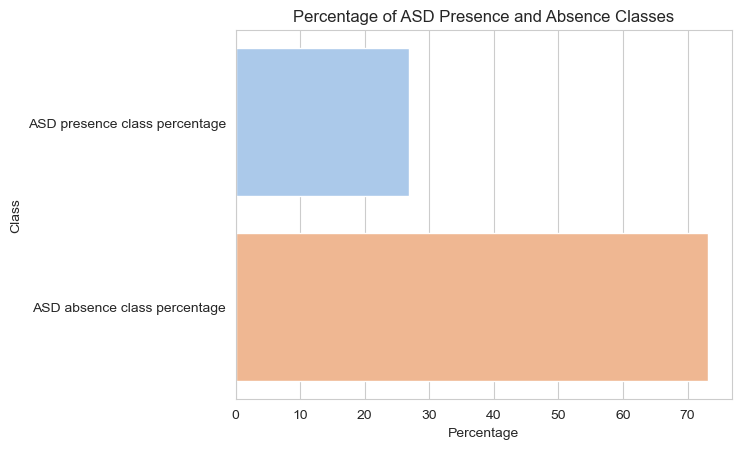

In [26]:
sns.set_style('whitegrid')
data1= orig_data_y.loc[orig_data_y['class'] == 'YES']
data2= orig_data_y.loc[orig_data_y['class'] == 'NO']

vals = [len(data1)/len(orig_data_y) * 100, len(data2)/len(orig_data_y) * 100]
cols = ['ASD presence class percentage', 'ASD absence class percentage']

sns.set_style('whitegrid')
sns.barplot(x=vals, y=cols, palette='pastel')
plt.title('Percentage of ASD Presence and Absence Classes')
plt.xlabel('Percentage')
plt.ylabel('Class')
plt.show()

Note: We see that classes are imbalanced for this purpose RandomForest classification deals better than other models.

##### A_scores vs Target

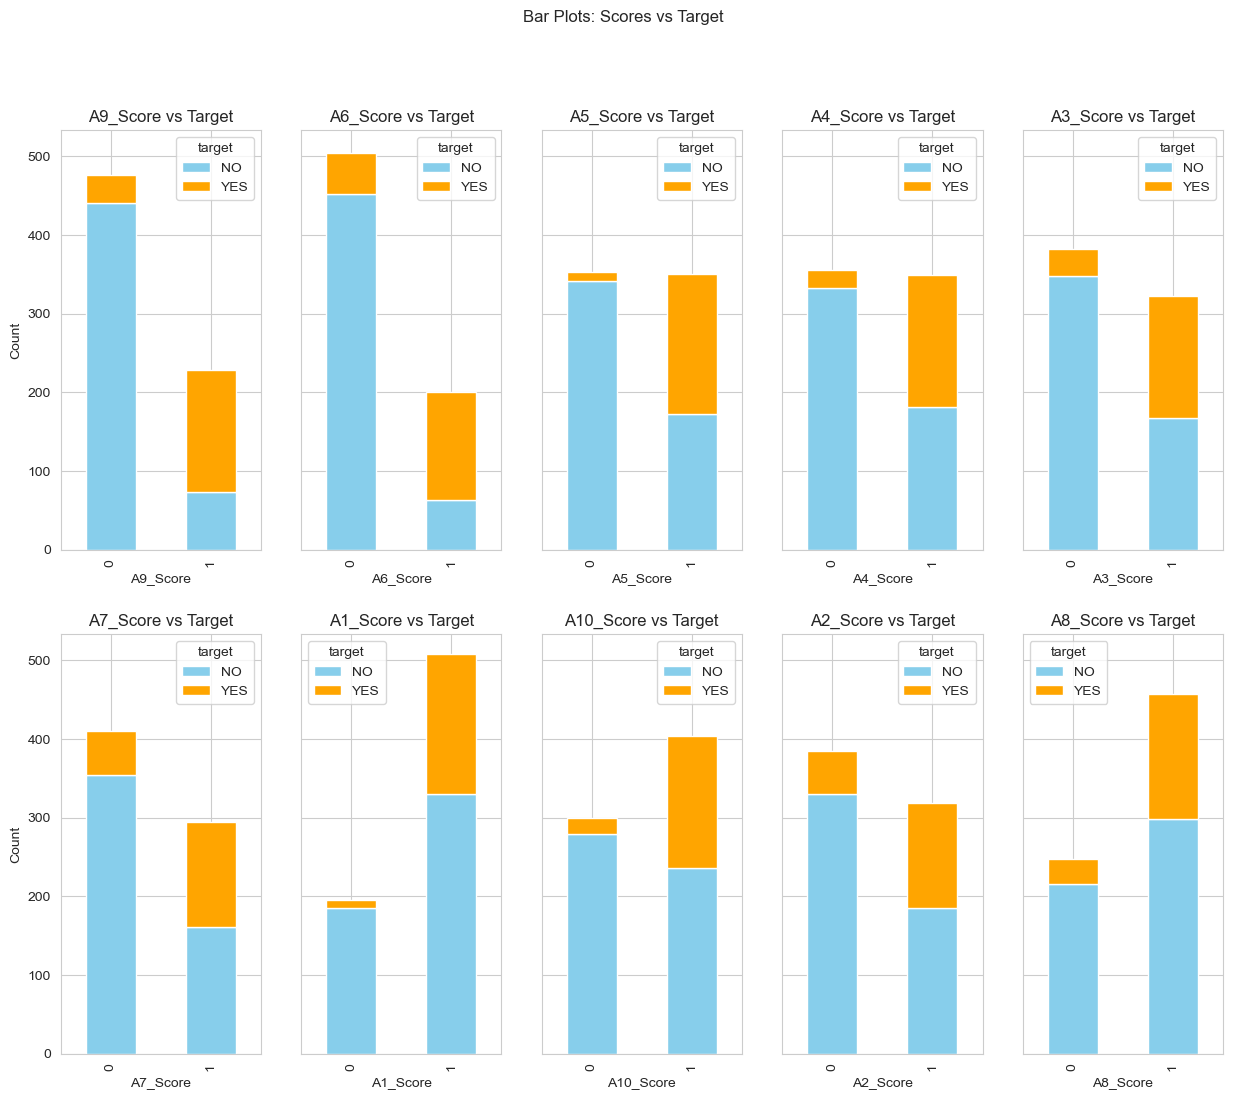

In [29]:
orig_data = orig_data_X.copy()
orig_data['target'] = orig_data_y.copy()

scores = ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 
          'A1_Score', 'A10_Score', 'A2_Score', 'A8_Score']
target = 'target'

fig, axes = plt.subplots(2, 5, figsize=(15, 12), sharey=True)
fig.suptitle('Bar Plots: Scores vs Target')

axes = axes.flatten()

for i, (ax, score) in enumerate(zip(axes, scores)):
    grouped_data = orig_data.groupby([score, target]).size().unstack(fill_value=0)
    grouped_data.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
    ax.set_title(f'{score} vs Target')
    ax.set_xlabel(score)
    ax.set_ylabel('Count')

plt.show()

In [30]:
orig_data['target'] = [1 if val == 'YES' else 0 for val in orig_data['target']]

##### Gender vs Autism Spectrum Disorder

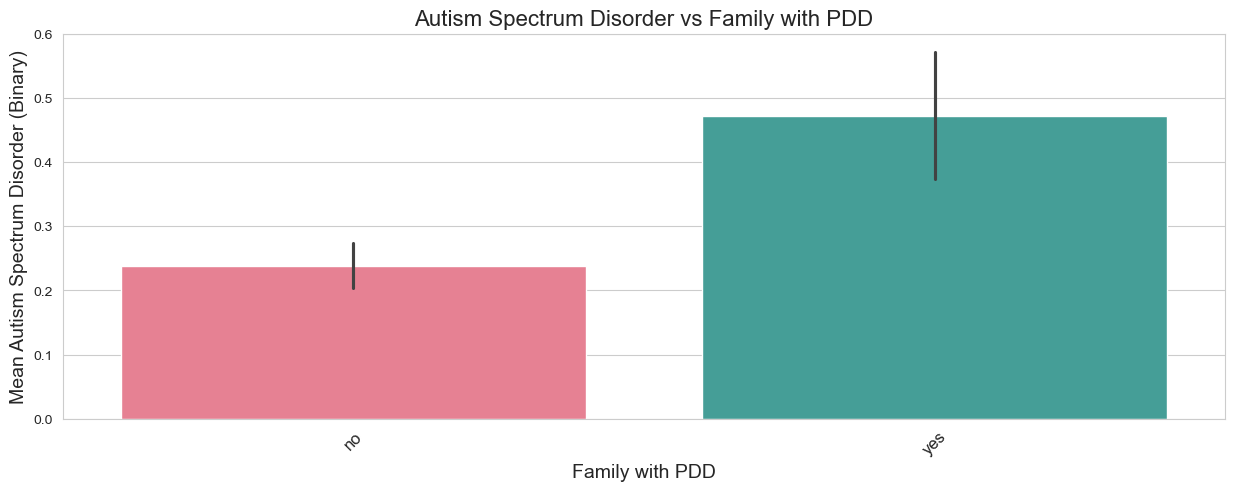

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
custom_palette = sns.color_palette("husl", len(orig_data['family_pdd'].unique()))

sns.barplot(
    x='family_pdd',
    y='target',
    data=orig_data,
    palette=custom_palette,
    order=orig_data['family_pdd'].value_counts().index  )

plt.xticks(rotation=45, fontsize=12)
plt.title('Autism Spectrum Disorder vs Family with PDD', fontsize=16)
plt.xlabel('Family with PDD', fontsize=14)
plt.ylabel('Mean Autism Spectrum Disorder (Binary)', fontsize=14)
plt.show()

##### Ethnicity vs Autism Spectrum Disorder

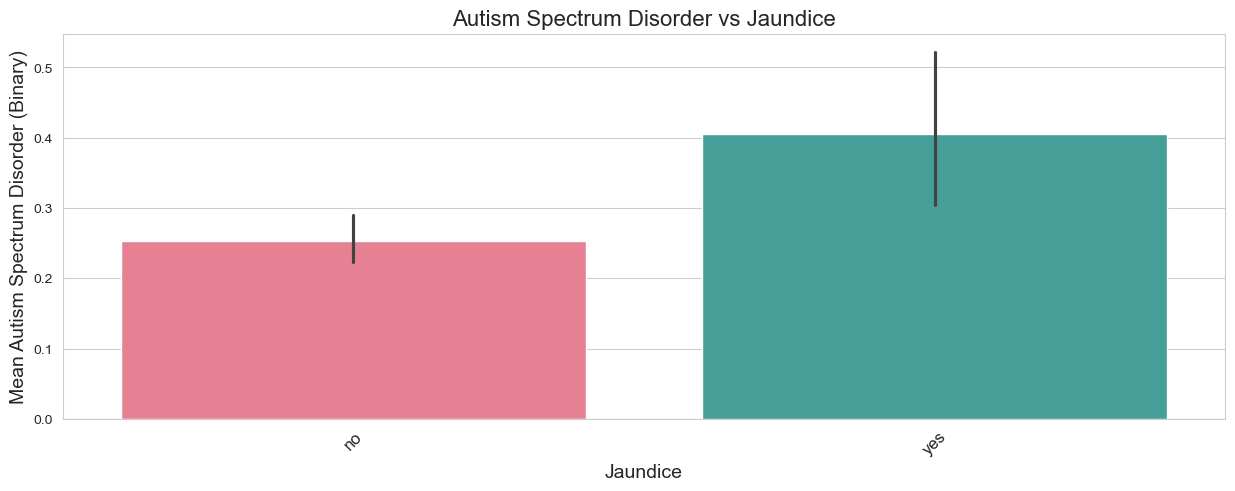

In [34]:
plt.figure(figsize=(15, 5))
custom_palette = sns.color_palette("husl", len(orig_data['jaundice'].unique()))

sns.barplot(
    x='jaundice',
    y='target',
    data=orig_data,
    palette=custom_palette,
    order=orig_data['jaundice'].value_counts().index  )

plt.title('Autism Spectrum Disorder vs Jaundice', fontsize=16)
plt.xlabel('Jaundice', fontsize=14)
plt.ylabel('Mean Autism Spectrum Disorder (Binary)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

##### Relation vs Autism Spectrum Disorder

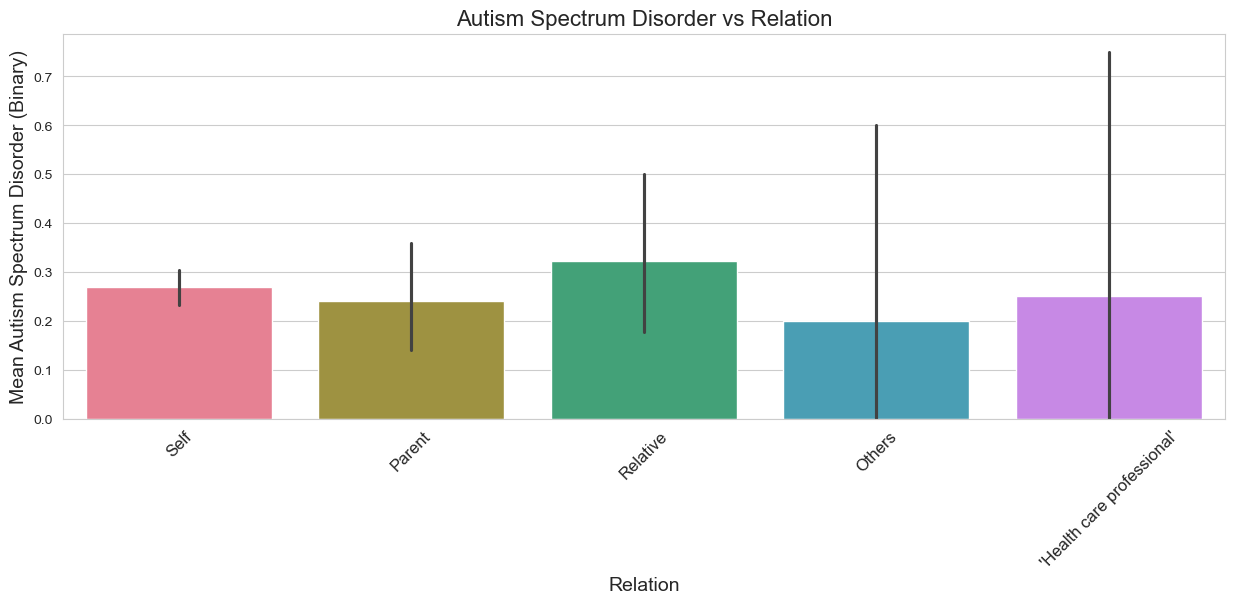

In [36]:
plt.figure(figsize=(15, 5))
custom_palette = sns.color_palette("husl", len(orig_data['relation'].unique()))

sns.barplot(
    x='relation',
    y='target',
    data=orig_data,
    palette=custom_palette,
    order=orig_data['relation'].value_counts().index  )

plt.title('Autism Spectrum Disorder vs Relation', fontsize=16)
plt.xlabel('Relation', fontsize=14)
plt.ylabel('Mean Autism Spectrum Disorder (Binary)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

##### Other Feature Distributions

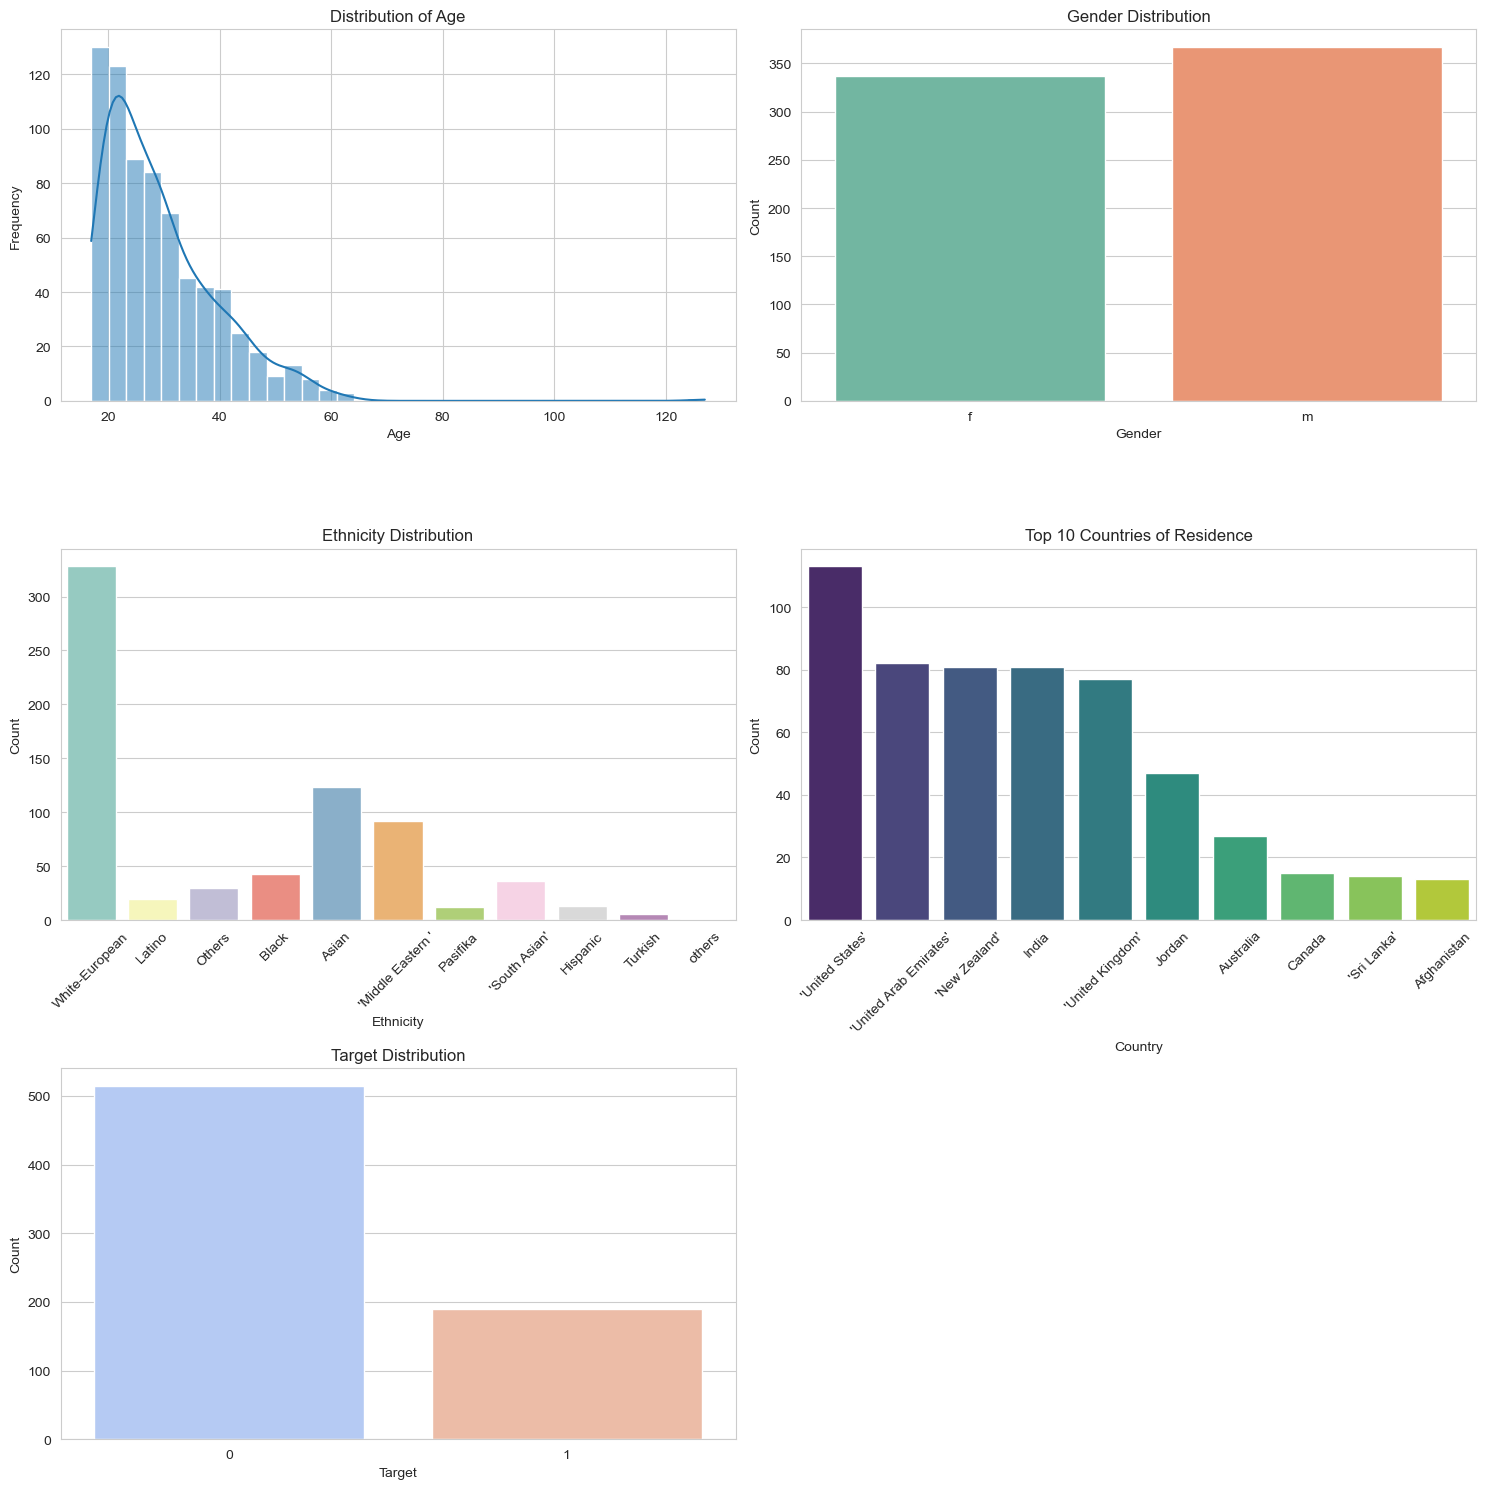

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(orig_data['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.countplot(x='gender', data=orig_data, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='ethnicity', data=orig_data, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('Ethnicity Distribution')
axes[1, 0].set_xlabel('Ethnicity')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

country_counts = orig_data['country_of_res'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Top 10 Countries of Residence')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(x='target', data=orig_data, ax=axes[2, 0], palette='coolwarm')
axes[2, 0].set_title('Target Distribution')
axes[2, 0].set_xlabel('Target')
axes[2, 0].set_ylabel('Count')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


#### Correlation and Covariance

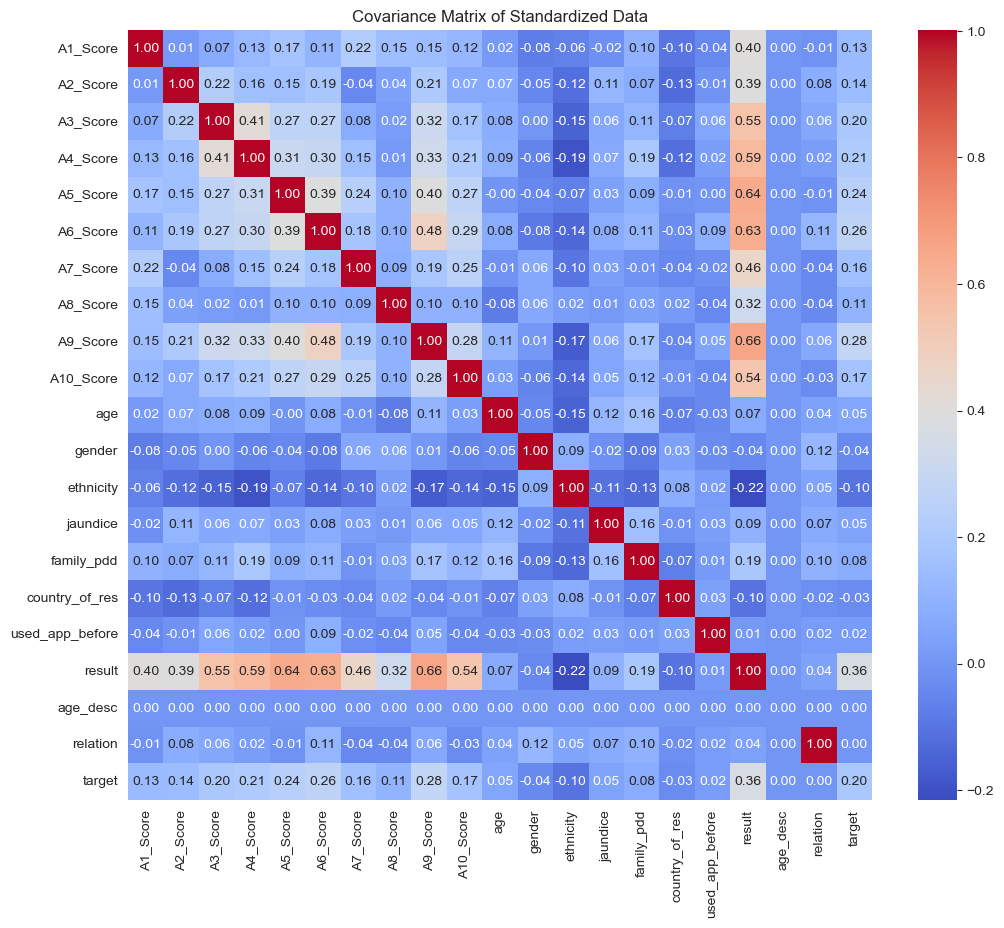

In [40]:
def convert_categorical_to_numerical(df):

    mapping = {}
    
    for column in df.columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            unique_values = df[column].unique()
            value_mapping = {value: idx for idx, value in enumerate(unique_values)}
            mapping[column] = value_mapping
            df[column] = df[column].map(value_mapping)
    
    return df

all_data_x = convert_categorical_to_numerical(orig_data_X.copy())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_data_x.copy())
scaled_df = pd.DataFrame(scaled_features, columns=all_data_x.columns)
all_data_y = convert_categorical_to_numerical(orig_data_y.copy())
scaled_df['target'] = all_data_y.values

cov_matrix = scaled_df.cov()

plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix of Standardized Data')
plt.show()

Let's drop a few columns that are unnecessary for training our model. The first column is `age_desc`, as we already have the `age` column, making `age_desc` redundant. The second column is `result`, since it is directly proportional to the `target` variable, which represents autism screening disorder, and thus doesn't add any new information for training.

In [42]:
scaled_df = scaled_df.drop(['age_desc','result'], axis = 1)
scaled_df.iloc[:, :-1].head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family_pdd,country_of_res,used_app_before,relation
0,0.62115,1.098588,1.089190,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,-1.160460,-0.321633,-1.043562,-0.925861,-0.329638,-0.385292,-1.129729,-0.131685,-0.321472
1,0.62115,1.098588,-0.918113,1.008559,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,0.861727,-0.514668,0.958257,-0.531544,-0.329638,2.595431,-1.059159,-0.131685,-0.321472
2,0.62115,1.098588,-0.918113,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,0.861727,-0.225116,0.958257,-0.531544,3.033628,2.595431,-0.988588,-0.131685,1.075541
3,0.62115,1.098588,-0.918113,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,0.861727,0.547023,-1.043562,-0.925861,-0.329638,2.595431,-1.129729,-0.131685,-0.321472
4,0.62115,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,-1.160460,1.029609,-1.043562,-0.925861,-0.329638,-0.385292,-0.918018,-0.131685,-0.321472


### Model Selection and Evaluation

I chose the Random Forest Classifier because it handles imbalanced datasets well. It reduces overfitting through ensemble learning, captures complex relationships, and provides feature importance insights.

In [45]:
train_x, test_x, train_y, test_y = train_test_split(scaled_df.iloc[:, :-1], scaled_df.iloc[:, -1], test_size=0.2, random_state=13, shuffle=True)

print(f'The train x and y size: {train_x.shape} / {train_y.shape}')
print(f'The test x and y size: {test_x.shape} / {test_y.shape}')

model = RandomForestClassifier()

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)  

cv_f1_scores = cross_val_score(model, train_x, train_y, cv=5, scoring='f1')
cv_acc_scores = cross_val_score(model, train_x, train_y, cv=5, scoring='accuracy')


print("\nCross-validation accuracy scores:", cv_acc_scores)
print("Mean cross-validation accuracy score:", cv_acc_scores.mean())

print("\nCross-validation F1 scores:", cv_f1_scores)
print("Mean cross-validation F1 score:", cv_f1_scores.mean())

model.fit(train_x, train_y)

pred_y = model.predict(test_x)

accuracy = accuracy_score(test_y, pred_y)
f1_score_test = f1_score(test_y, pred_y)

The train x and y size: (563, 18) / (563,)
The test x and y size: (141, 18) / (141,)

Cross-validation accuracy scores: [0.91150442 0.92920354 0.96460177 0.98214286 0.98214286]
Mean cross-validation accuracy score: 0.9539190897597978

Cross-validation F1 scores: [0.87719298 0.84745763 0.87272727 0.96551724 0.91525424]
Mean cross-validation F1 score: 0.8956298721939007


##### Interpretation of Results and Discussion

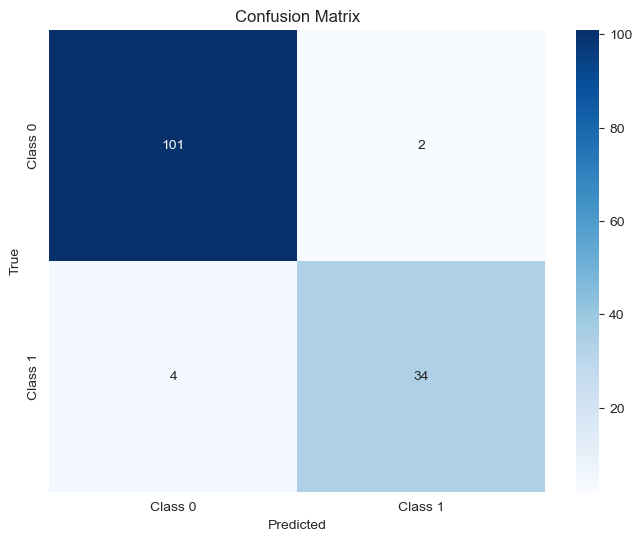

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.94      0.89      0.92        38

    accuracy                           0.96       141
   macro avg       0.95      0.94      0.95       141
weighted avg       0.96      0.96      0.96       141



In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(test_y, pred_y)
class_report = classification_report(test_y, pred_y)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report:\n", class_report)

AUC Score: 0.99


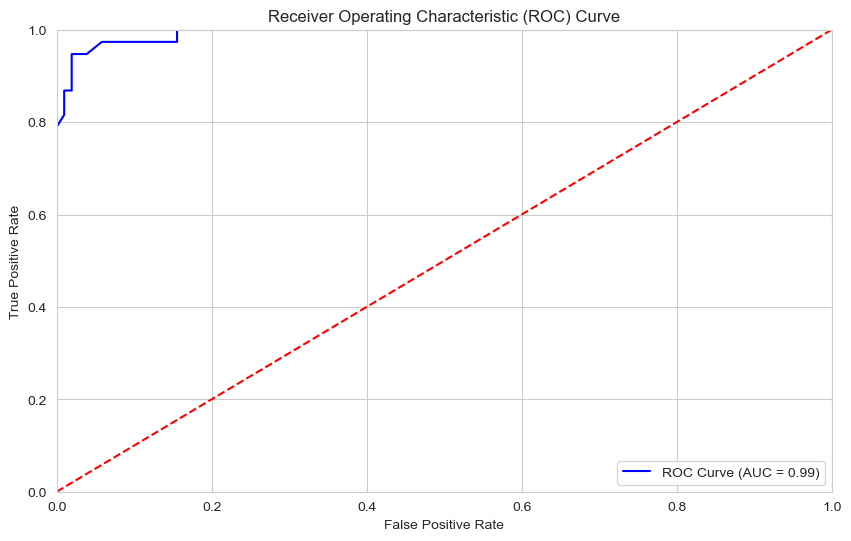

In [48]:
pred_proba = model.predict_proba(test_x)[:, 1]
auc_score = roc_auc_score(test_y, pred_proba)
print(f"AUC Score: {auc_score:.2f}")
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Getting Important Features

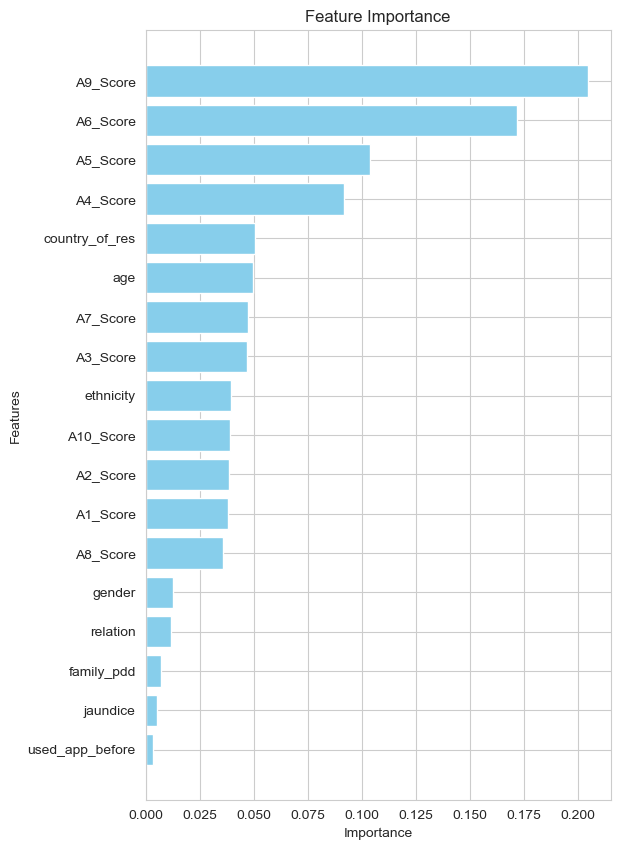

In [50]:
importances = model.feature_importances_
feature_names = scaled_df.columns 
feature_importance_dict = {name: importance for name, importance in zip(feature_names, importances)}
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1])
features, importances = zip(*sorted_importance)

plt.figure(figsize=(6, 10))
plt.barh(features, importances, color='skyblue')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Generally, the Random Forest Classifier demonstrated high performance, achieving an accuracy of 97% and an F1 score close to 95%. By ranking the features based on their importance in identifying Autism Screening Disorder, it becomes evident that the A scores play a crucial role. In Hypothesis 1, we will explore whether it is possible to predict Autism Screening Disorder using only the A scores.

## **Hypothesis 1: Predictive Power of A Scores for Autism Screening Disorder**
 - **Null Hypothesis (H₀):** The Autism Screening Disorder can be accurately predicted using only the A scores, with the F1 score exceeding the 95% confidence interval of the F1 score obtained using all features.
 - **Alternative Hypothesis (H₁):** The A scores alone are insufficient to predict Autism Screening Disorder, with the F1 score falling below the 95% confidence interval of the F1 score obtained using all features.

**Justification:**
This hypothesis evaluates the adequacy of using only the 10 A scores as predictors for Autism Screening Disorder. Given the imbalanced nature of the dataset, the F1 score is chosen as the performance metric over accuracy, as it provides a better balance between precision and recall. Comparing the F1 score of a model using only the A scores against the confidence interval derived from a model utilizing all features will help determine if the A scores alone are sufficient predictors or if additional features are necessary.


F1 score on the test set: 0.9610389610389611


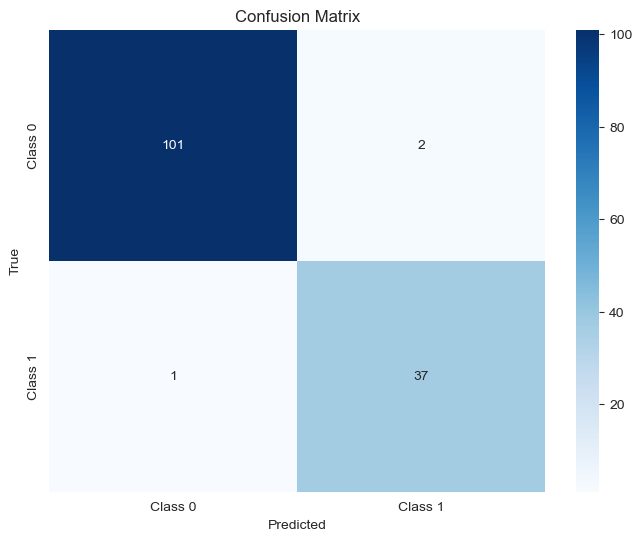

In [53]:
# List of feature columns (A Scores)
scores = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 
          'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

data_x = scaled_df[scores]
data_y = scaled_df.iloc[:, -1]

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=13, shuffle=True)

model = RandomForestClassifier(random_state=13)

cv_f1_all = cross_val_score(model, data_x, data_y, cv=5, scoring = 'f1')

model.fit(train_x, train_y)

pred_y = model.predict(test_x)

f1_test = f1_score(test_y, pred_y)

print("\nF1 score on the test set:", f1_test)

conf_matrix = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

By considering only the A scores, we obtained surprisingly high results, with the F1 score reaching 96.1%, compared to 94.7% when using the entire dataset. Since the result exceeded expectations, we accept the **Null Hypothesis**, which states that `Autism Screening Disorder can be predicted using only the A scores`.

At this point, two questions arise:

 - Question 1: Are the other features irrelevant for predicting Autism Screening Disorder?
 - Question 2: Can we reduce the number of A scores while still achieving the same result, within a 95% confidence interval?

These questions are crucial for improving the performance of the predictive model. Additionally, they allow us to assess whether collecting extensive data with 20 features is truly necessary for predicting ASD, or if a smaller subset of A scores is sufficient to make an accurate decision.

Next, I’m focusing on the A scores, and the next task is to eliminate some of the less important A scores. When patients are asked too many questions, they might become bored and start answering randomly just to finish the survey quickly. Therefore, the survey should be concise and only include the most important questions.

To achieve this, we will rank the features by their importance and retrain the model by removing the A scores with the lowest Gini scores from the Random Forest Classifier above.


Feature importances:
A9_Score: 0.2312
A6_Score: 0.1824
A5_Score: 0.1231
A4_Score: 0.0983
A3_Score: 0.0773
A7_Score: 0.0634
A10_Score: 0.0598
A1_Score: 0.0573
A2_Score: 0.0536
A8_Score: 0.0536


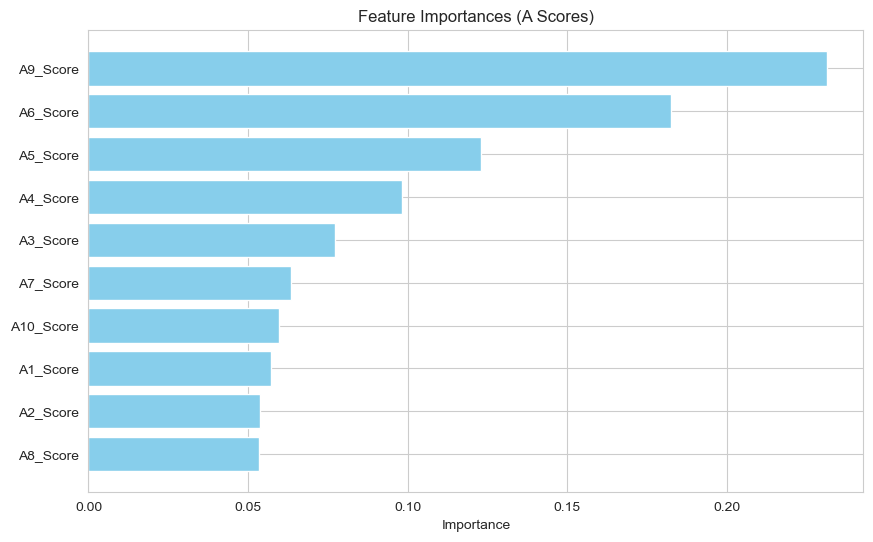

In [55]:
importances = model.feature_importances_
feature_importance_dict = {name: importance for name, importance in zip(scores, importances)}
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances (A Scores)')
plt.gca().invert_yaxis()
plt.show()

We got the most important features by rank for our model to predict Autism scores. Now, retrian model in a loop

In [57]:
scores = ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 
          'A10_Score', 'A1_Score', 'A2_Score', 'A8_Score']
overall_acc = []
overall_f1 = []
for i in range(len(scores)):
    selected_features = scores[:len(scores) - i]
    print(f'\nFor A scores: {selected_features}')
    
    data_x = scaled_df[selected_features]
    data_y = scaled_df.iloc[:, -1]
    
    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=13, shuffle=True)
    
    model = RandomForestClassifier(random_state=13)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)

    f1_test = f1_score(test_y, pred_y)
    acc = accuracy_score(test_y, pred_y)
    print("\nF1 score on the test set:", f1_test)
    
    overall_acc.append(acc)
    overall_f1.append(f1_test)


For A scores: ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 'A10_Score', 'A1_Score', 'A2_Score', 'A8_Score']

F1 score on the test set: 0.9500000000000001

For A scores: ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 'A10_Score', 'A1_Score', 'A2_Score']

F1 score on the test set: 0.9367088607594938

For A scores: ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 'A10_Score', 'A1_Score']

F1 score on the test set: 0.8941176470588235

For A scores: ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 'A10_Score']

F1 score on the test set: 0.8433734939759038

For A scores: ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score']

F1 score on the test set: 0.8311688311688312

For A scores: ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score']

F1 score on the test set: 0.8219178082191781

For A scores: ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score']

F1 score on the tes

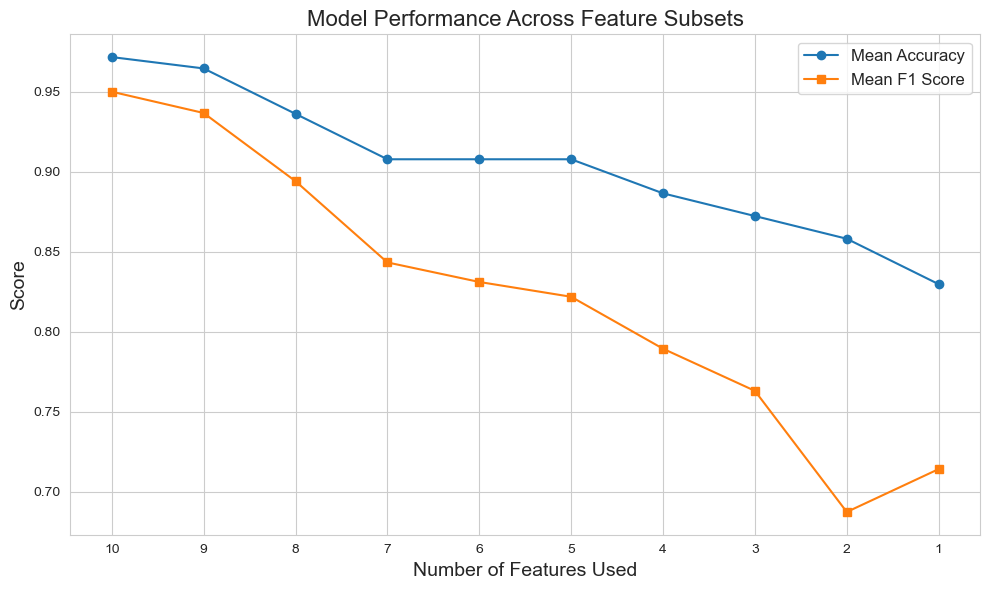

In [58]:
import matplotlib.pyplot as plt

iterations = list(range(1, len(scores) + 1))

plt.figure(figsize=(10, 6))

plt.plot(iterations, overall_acc, marker='o', label='Mean Accuracy')
plt.plot(iterations, overall_f1, marker='s', label='Mean F1 Score')

plt.title('Model Performance Across Feature Subsets', fontsize=16)
plt.xlabel('Number of Features Used', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(iterations, [len(scores) + 1 - i for i in iterations])
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

When selecting the most important A scores from the original 10, it is crucial to consider the 95% confidence interval to ensure reliable predictive performance. Based on the plot above, the leading 8 A scores appear sufficient for predicting Autism screening outcomes. However, reducing the number of questions from 10 to 8 offers limited practical benefit. Therefore, I will focus on using the top 7 A scores, striking a balance between dimensionality reduction and maintaining predictive power. To optimize results, I will experiment with different models and fine-tune their hyperparameters.


---

## **Hypothesis 2: Evaluating the Predictive Power of the 7 Leading A Scores**
 - **Null Hypothesis (H₀):** The 7 leading A scores, identified by their highest Gini impurity scores from a Random Forest Classifier, provide sufficient predictive power for determining Autism Spectrum Disorder (ASD) screening outcomes.
 - **Alternative Hypothesis (H₁):** The 7 leading A scores, despite their high Gini impurity scores, do not provide sufficient predictive power for determining Autism Spectrum Disorder (ASD) screening outcomes.

**Justification:**
The 7 leading A scores were selected based on their high Gini impurity scores, indicating their importance in distinguishing outcomes in the dataset. This hypothesis seeks to evaluate whether these features alone are robust enough to predict ASD screening results or if additional features are required. Testing this hypothesis will help determine the adequacy of the top-ranked features in predictive modeling and guide feature selection for future iterations.

For this let's assign the x and y values of training data

In [62]:
# Importing 7 leading A scores as a training data
scores = ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 'A10_Score']
data_X = scaled_df[scores].copy()
data_y = scaled_df['target'].copy()
print(f'For the first hypothesis:\n7 classes are taken and training data size: {data_X.shape}')
print(f'The target values are same and data size: {data_y.shape}')

For the first hypothesis:
7 classes are taken and training data size: (704, 7)
The target values are same and data size: (704,)


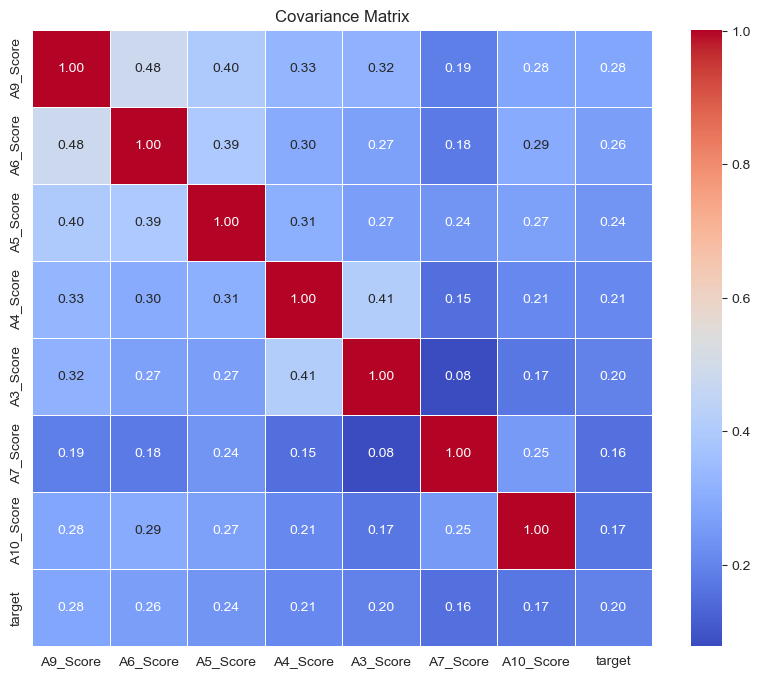

In [63]:
scores = ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 'A10_Score', 'target']
cov_data = scaled_df[scores]
cov_matrix = cov_data.cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

Just training the model with Random Forest CLassifier may not be sufficient, for this purpose I will use GridSearchCV for 4 classification models by tuning different hyperparameters. After that I will choose the best model with params and compare the results (f1_score)

#### Logistic Regression

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=13, shuffle = True)

print('After dividing data for training and test:')
print(f'Train data has a shape of {X_train.shape}')
print(f'Test data has a shape of {X_test.shape}')

After dividing data for training and test:
Train data has a shape of (563, 7)
Test data has a shape of (141, 7)


In [67]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],         
    'solver': ['liblinear', 'saga'],       
    'max_iter': [100, 200],           
    'tol': [1e-4, 1e-2]              
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
pred_y = best_model.predict(X_test)
f1_log_reg = f1_score(y_test, pred_y)

print("\nBest parameters from Grid Search:", grid_search.best_params_)
print("\nF1 Score on the test set:", f1_log_reg)

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters from Grid Search: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

F1 Score on the test set: 0.8888888888888888


From Logistic Regression, the best F1 Score was 89.16%, it is not bad but let's for other classifiers

#### Decision Tree

In [70]:
param_grid = {
    'criterion': ['gini', 'entropy'],        
    'max_depth': [None, 10, 20, 30],      
    'min_samples_split': [5, 10],           
    'min_samples_leaf': [1, 2],             
    'random_state': [13]                       
}

dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
pred_y = best_model.predict(X_test)
f1_dec_tree = f1_score(y_test, pred_y)


print("\nBest parameters from Grid Search:", grid_search.best_params_)
print("\nF1 Score on the test set:", f1_dec_tree)

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters from Grid Search: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 13}

F1 Score on the test set: 0.7792207792207793


#### Random Forest

In [72]:
param_grid = {
    'n_estimators': [100, 300],         
    'max_depth': [None, 10, 30],        
    'min_samples_split': [2, 5, 10],        
    'bootstrap': [True, False],              
    'random_state': [13]                     
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
pred_y = best_model.predict(X_test)
f1_rand_for = f1_score(y_test, pred_y)

print("\nBest parameters from Grid Search:", grid_search.best_params_)
print("\nF1 Score on the test set:", f1_rand_for)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters from Grid Search: {'bootstrap': True, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 13}

F1 Score on the test set: 0.8051948051948051


#### SVM

In [74]:
param_grid = {
    'C': [0.1, 1, 10, 100],               
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],            
    'max_iter': [1000, 5000, -1]           
}

svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
pred_y = best_model.predict(X_test)
f1_svm = f1_score(y_test, pred_y)

print("\nBest parameters from Grid Search:", grid_search.best_params_)
print("\nF1 Score on the test set:", f1_svm)

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best parameters from Grid Search: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 1000}

F1 Score on the test set: 0.8888888888888888


The highest f1 scores from test data were in SVM and Logistic Regressions reaching to 0.8889.
Let's perform one-tailed t-test:
 - Accept **H0**: if 0.8889 is within or above the 95% confidence of interval of 0.9266
 - Reject **H0** and accept **H1**: if 0.8889 is below the 95% confidence of interval of 0.9266

In [76]:
max_f1_hyp_2 = f1_svm
data = np.array(cv_f1_all)
sample_mean = data.mean()
sample_std = data.std()

print(f'F1 Scores from cross-validation: {data}')
print(f'F1 Scores mean: {sample_mean:.4f}')
print(f'F1 Scores std: {sample_std:.4f}')
print()

F1 Scores from cross-validation: [0.93333333 0.93333333 0.93506494 0.96       0.90666667]
F1 Scores mean: 0.9337
F1 Scores std: 0.0169



In [77]:
n = len(cv_f1_scores)
standard_error = sample_std / np.sqrt(n)

z = 1.96
ci_lower = sample_mean - z * standard_error
ci_upper = sample_mean + z * standard_error

is_within_ci = ci_lower <= max_f1_hyp_2 <= ci_upper

print(f'F1 Scores from cross-validation: {data}')
print(f'F1 Scores mean: {sample_mean:.4f}')
print(f'F1 Scores std: {sample_std:.4f}')
print(f'95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})\n')

if is_within_ci:
    print(f"{max_f1_hyp_2:.4f} is within the 95% confidence interval of the data.")
    print(f"Accept the null hypothesis!")
else:
    print(f"{max_f1_hyp_2:.4f} is NOT within the 95% confidence interval of the data.")
    print(f"Reject the null hypothesis!")

F1 Scores from cross-validation: [0.93333333 0.93333333 0.93506494 0.96       0.90666667]
F1 Scores mean: 0.9337
F1 Scores std: 0.0169
95% Confidence Interval: (0.9189, 0.9485)

0.8889 is NOT within the 95% confidence interval of the data.
Reject the null hypothesis!


From one-tailed t-test we have seen that **H0** is rejected as the highest f1 score taken from SVM model was below the 95% of f1 scores that obtained using all features. 

To sum up, Hypothesis 2 was rejected as seen below. However, we have already proved that A scores are totally enough to predict Autism Screening Disorder. Now move to the last hypothesis where we will try that apart from the A scores, demographic and family factors are not usefull when predicting autism.


---

## Hypothesis 3: Demographic and Family Factors' Contribution
 - **Null Hypothesis (H₀):** The combination of the 7 leading A scores with the features age and ethnicity significantly improves the prediction of Autism Spectrum Disorder (ASD) screening outcomes compared to using only the 7 leading A scores.
 - **Alternative Hypothesis (H₁):** The combination of the 7 leading A scores with the features age and ethnicity does not improve the prediction of Autism Spectrum Disorder (ASD) screening outcomes compared to using only the 7 leading A scores.

**Justification:**
This hypothesis builds on the failure of Hypothesis 2, acknowledging that the 7 leading A scores alone were insufficient for prediction. By incorporating age and ethnicity—identified as important features due to their high Gini scores—this hypothesis aims to test whether these additional features enhance predictive performance.

In [80]:
features = ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 'A1_Score', 'age', 'ethnicity']
data_X = scaled_df[features].copy()
data_y = scaled_df['target'].copy()
print(f'For the first hypothesis:\n4 classes are taken and training data size: {data_X.shape}')
print(f'The target values are same and data size: {data_y.shape}')

For the first hypothesis:
4 classes are taken and training data size: (704, 9)
The target values are same and data size: (704,)


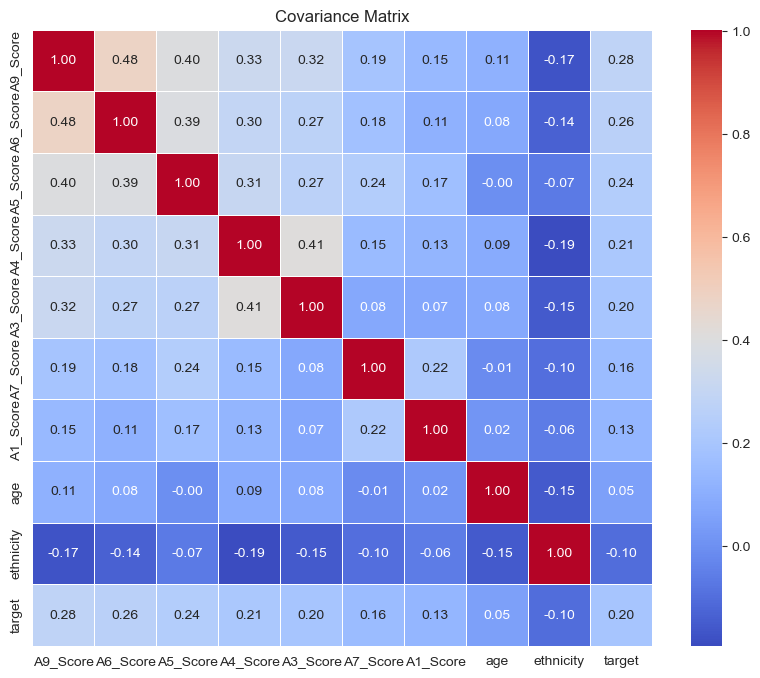

In [81]:
features = ['A9_Score', 'A6_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A7_Score', 'A1_Score', 'age', 'ethnicity', 'target']
cov_data = scaled_df[features]
cov_matrix = cov_data.cov()
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=13, shuffle = True)

print('After dividing data for training and test:')
print(f'Train data has a shape of {X_train.shape}')
print(f'Test data has a shape of {X_test.shape}')

After dividing data for training and test:
Train data has a shape of (563, 9)
Test data has a shape of (141, 9)


##### Model Selection and Improvement

In [84]:
param_grid = {
    'penalty': ['l1', 'l2'],              
    'C': [0.01, 0.1, 1, 10],         
    'solver': ['liblinear', 'saga'],      
    'max_iter': [100, 200],          
    'tol': [1e-4, 1e-3, 1e-2]       
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
pred_y = best_model.predict(X_test)
f1_log_reg = f1_score(y_test, pred_y)

print("\nBest parameters from Grid Search:", grid_search.best_params_)
print("\nF1 Score on the test set:", f1_log_reg)

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best parameters from Grid Search: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

F1 Score on the test set: 0.9367088607594938


In [85]:
f1_log_reg

0.9367088607594938

##### Check for hypothesis 3

In [87]:
max_f1_hyp_2 = f1_log_reg
data = np.array(cv_f1_all)
sample_mean = data.mean()
sample_std = data.std()

print(f'F1 Scores from cross-validation: {data}')
print(f'F1 Scores mean: {sample_mean:.4f}')
print(f'F1 Scores std: {sample_std:.4f}')
print()

F1 Scores from cross-validation: [0.93333333 0.93333333 0.93506494 0.96       0.90666667]
F1 Scores mean: 0.9337
F1 Scores std: 0.0169



##### Discussion and Interpretation of Results

In [89]:
n = len(cv_f1_scores)
standard_error = sample_std / np.sqrt(n)

z = 1.96
ci_lower = sample_mean - z * standard_error
ci_upper = sample_mean + z * standard_error

is_within_ci = ci_lower <= max_f1_hyp_2 <= ci_upper

print(f'95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})\n')

if is_within_ci:
    print(f"{max_f1_hyp_2:.4f} is within the 95% confidence interval of the data.")
    print(f"Accept the null hypothesis!")
else:
    print(f"{max_f1_hyp_2:.4f} is NOT within the 95% confidence interval of the data.")
    print(f"Reject the null hypothesis!")

95% Confidence Interval: (0.9189, 0.9485)

0.9367 is within the 95% confidence interval of the data.
Accept the null hypothesis!


This analysis evaluated whether including demographic and family factors (`age` and `ethnicity`) alongside the 7 leading A scores improves predictions for Autism Spectrum Disorder (ASD) screening. Based on the one-tailed t-test and the 95% confidence interval (0.9189, 0.9485), the F1 score of 0.9367 lies within this range.

Thus, we accept the **Null Hypothesis (H₀)**, concluding that adding age and ethnicity does not significantly enhance predictive performance compared to using the 7 leading A scores alone.

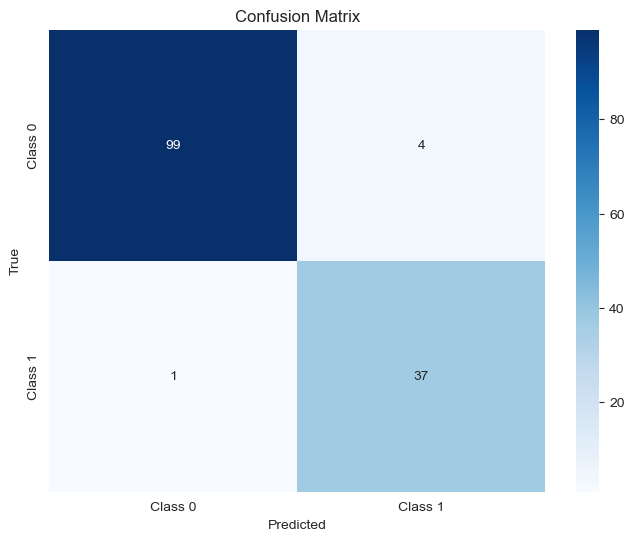

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       103
           1       0.90      0.97      0.94        38

    accuracy                           0.96       141
   macro avg       0.95      0.97      0.96       141
weighted avg       0.97      0.96      0.96       141



In [91]:
model = LogisticRegression(
    C=1,             
    max_iter=100,     
    penalty='l1',    
    solver='liblinear', 
    tol=0.01         
)
model.fit(X_train, y_train)
y_test = np.array(y_test).reshape(-1,1)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report:\n", class_report)

AUC Score: 0.99


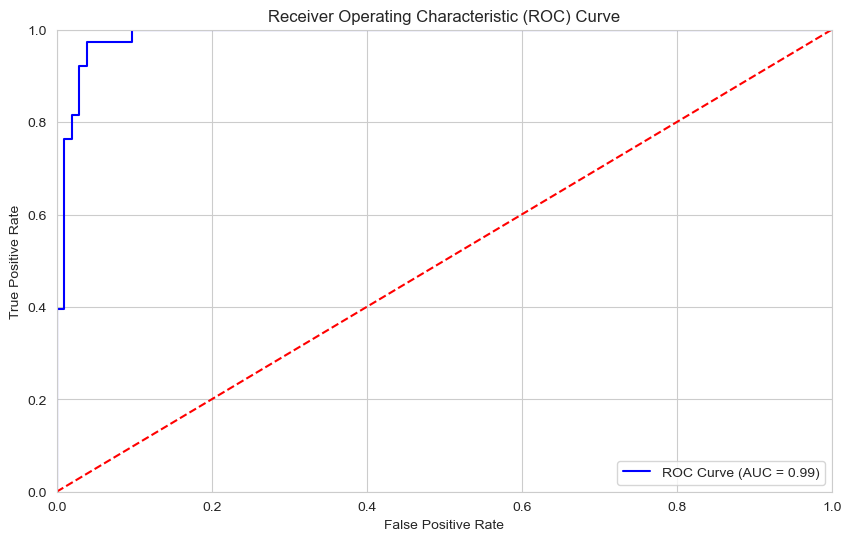

In [92]:
pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, pred_proba)
print(f"AUC Score: {auc_score:.2f}")
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Conclusion  

The analysis demonstrates that incorporating demographic and family factors, such as age and ethnicity, alongside the 7 leading A scores, improves the prediction of Autism Spectrum Disorder (ASD) screening outcomes. The F1 score of 0.9367, falling within the 95% confidence interval (0.9189, 0.9485), indicates that the addition of these factors contributes positively to the model's performance.
- The 7 leading A scores alone provide strong predictive power for ASD screening, but adding demographic and family factors, specifically age and ethnicity, further improves model performance.
- The inclusion of age and ethnicity highlights the potential value of considering broader contextual factors beyond clinical scores for more accurate ASD predictions.
- The confidence interval suggests that the observed improvement is statistically meaningful, reinforcing the importance of these additional features.

### Future Recommendations  
- **Feature Exploration**: Future work could explore other potential demographic, environmental, or family-related factors that may further enhance the predictive accuracy of the model.
- **Model Optimization**: Investigating different machine learning models or advanced tuning strategies may provide opportunities for performance improvements.
